Ref: https://github.com/lyhue1991/eat_tensorflow2_in_30_days/blob/master/5-1%2C%E6%95%B0%E6%8D%AE%E7%AE%A1%E9%81%93Dataset.md

https://www.tensorflow.org/tutorials/load_data/images

In [1]:
!git clone https://github.com/lyhue1991/eat_tensorflow2_in_30_days
!mv ./eat_tensorflow2_in_30_days/data .

Cloning into 'eat_tensorflow2_in_30_days'...
remote: Enumerating objects: 14632, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14632 (delta 6), reused 9 (delta 4), pack-reused 14617
Receiving objects: 100% (14632/14632), 59.88 MiB | 23.50 MiB/s, done.
Resolving deltas: 100% (13239/13239), done.
Checking out files: 100% (12529/12529), done.


In [12]:
#1.從Numpy array構建數據管道
import tensorflow as tf
import numpy as np 
from sklearn import datasets 
iris = datasets.load_iris()

ds1 = tf.data.Dataset.from_tensor_slices((iris["data"],iris["target"]))
for features,label in ds1.take(5):
    print(features,label)

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)


In [3]:
#2.從 Pandas DataFrame構建數據管道
import tensorflow as tf
from sklearn import datasets 
import pandas as pd
iris = datasets.load_iris()
dfiris = pd.DataFrame(iris["data"],columns = iris.feature_names)
ds2 = tf.data.Dataset.from_tensor_slices((dfiris.to_dict("list"),iris["target"]))

for features,label in ds2.take(3):
    print(features,label)

{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.7>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.2>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.3>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)


In [4]:
#3.從Python generator構建數據管道
import tensorflow as tf
from matplotlib import pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#定義一個從文件中讀取圖片的generator
image_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
                    "./data/cifar2/test/",
                    target_size=(32, 32),
                    batch_size=20,
                    class_mode='binary')

classdict = image_generator.class_indices
print(classdict)

def generator():
    for features,label in image_generator:
        yield (features,label)

ds3 = tf.data.Dataset.from_generator(generator,output_types=(tf.float32,tf.int32))

Found 2000 images belonging to 2 classes.
{'airplane': 0, 'automobile': 1}


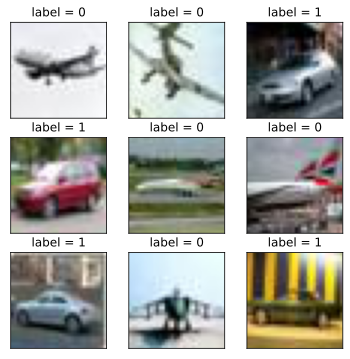

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds3.unbatch().take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

In [6]:
#4.從csv文件構建數據管道
ds4 = tf.data.experimental.make_csv_dataset(
      file_pattern = ["./data/titanic/train.csv","./data/titanic/test.csv"],
      batch_size=3, 
      label_name="Survived",
      na_value="",
      num_epochs=1,
      ignore_errors=True)

for data,label in ds4.take(2):
    print(data,label)

OrderedDict([('PassengerId', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([348, 359, 747], dtype=int32)>), ('Pclass', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 3, 3], dtype=int32)>), ('Name', <tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Davison, Mrs. Thomas Henry (Mary E Finck)',
       b'McGovern, Miss. Mary', b'Abbott, Mr. Rossmore Edward'],
      dtype=object)>), ('Sex', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'female', b'female', b'male'], dtype=object)>), ('Age', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.,  0., 16.], dtype=float32)>), ('SibSp', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 0, 1], dtype=int32)>), ('Parch', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 1], dtype=int32)>), ('Ticket', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'386525', b'330931', b'C.A. 2673'], dtype=object)>), ('Fare', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([16.1   ,  7.8792, 20.25  ], dtype=float32)>), ('Cabin', 

In [7]:
#5.從文本文件構建數據管道
ds5 = tf.data.TextLineDataset(
    filenames = ["./data/titanic/train.csv","./data/titanic/test.csv"]
    ).skip(1) #略去第一行header

for line in ds5.take(5):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,,S', shape=(), dtype=string)


In [8]:
#6.從文件路徑構建數據管道
ds6 = tf.data.Dataset.list_files("./data/cifar2/train/*/*.jpg")
for file in ds6.take(5):
    print(file)

tf.Tensor(b'./data/cifar2/train/automobile/4844.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/1345.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/airplane/2023.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/1023.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/3240.jpg', shape=(), dtype=string)


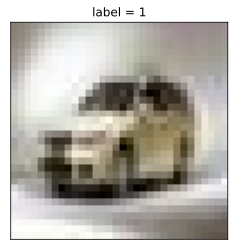

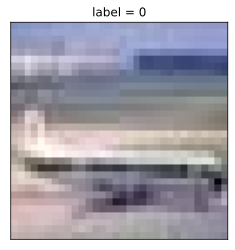

In [9]:
from matplotlib import pyplot as plt

def load_image(img_path,size = (32,32)):
    label = 1 if tf.strings.regex_full_match(img_path,".*/automobile/.*") else 0
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) #注意此處為jpeg格式
    img = tf.image.resize(img,size)
    return(img,label)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
for i,(img,label) in enumerate(ds6.map(load_image).take(2)):
    plt.figure(i)
    plt.imshow((img/255.0).numpy())
    plt.title("label = %d"%label)
    plt.xticks([])
    plt.yticks([])

In [10]:
#7.從tfrecords文件構建數據管道
import os
import numpy as np

# inpath：原始數據路徑 outpath:TFRecord文件輸出路徑
def create_tfrecords(inpath,outpath): 
    writer = tf.io.TFRecordWriter(outpath)
    dirs = os.listdir(inpath)
    for index, name in enumerate(dirs):
        class_path = inpath +"/"+ name+"/"
        for img_name in os.listdir(class_path):
            img_path = class_path + img_name
            img = tf.io.read_file(img_path)
            #img = tf.image.decode_image(img)
            #img = tf.image.encode_jpeg(img) #統一成jpeg格式壓縮
            example = tf.train.Example(
               features=tf.train.Features(feature={
                    'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img.numpy()]))
               }))
            writer.write(example.SerializeToString())
    writer.close()
    
create_tfrecords("./data/cifar2/test/","./data/cifar2_test.tfrecords/")

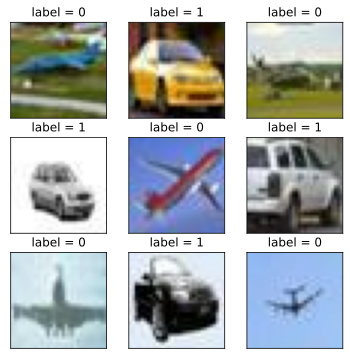

In [11]:
from matplotlib import pyplot as plt 

def parse_example(proto):
    description ={ 'img_raw' : tf.io.FixedLenFeature([], tf.string),
                   'label': tf.io.FixedLenFeature([], tf.int64)} 
    example = tf.io.parse_single_example(proto, description)
    img = tf.image.decode_jpeg(example["img_raw"])   #注意此處為jpeg格式
    img = tf.image.resize(img, (32,32))
    label = example["label"]
    return(img,label)

ds7 = tf.data.TFRecordDataset("./data/cifar2_test.tfrecords").map(parse_example).shuffle(3000)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds7.take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow((img/255.0).numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()